link a la presentacion

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset_df = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [3]:
dataset_df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [4]:
clients_df = pd.read_csv('/datasets/telecom_clients_us.csv')

In [5]:
clients_df

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


mirando los datos,así de primera mano, el tipo de datos no es coherente para las variables,
- el user_id puede ser entrero pero tambien podria ser object
- date deberia ser de formato fecha
- la direcciones esta bien
- internal deberia ser mejor bool
- operator_id podria manejarse como float o int, pero al haber valores nulos si lo convierto a str me va a generar problemas, asi que mejor lo dejo como float 
- is_missed_call esta bien de tipo bool
- calls_count de tipo int esta bien
- y call_duration y total_call_duration se podria ver si se mejora la precision si se convierten a flotantes.

Por otro lado hay datos nulos en la columna internal y operator_id

In [7]:
dataset_df['date'] = pd.to_datetime(dataset_df['date'])

al convertir a formato datetime la fecha me queda en formato de ns, por la variacion del indice horario, asi que creo que esto no deberia afectar mi analisis

In [8]:
print(dataset_df['date'].max())
print(dataset_df['date'].min())


2019-11-28 00:00:00+03:00
2019-08-02 00:00:00+03:00


In [9]:
dataset_df['date'].mean()

Timestamp('2019-10-23 01:00:32.191755520+0300', tz='pytz.FixedOffset(180)')

In [10]:
dataset_df['date'] = dataset_df['date'].dt.tz_localize(None)

In [11]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


ahora si quedo como datetime64[ns]

In [12]:
# diccionario de conversiones 
conversiones = {
    'internal': 'boolean',
    'call_duration': float,
    'total_call_duration': float
}

dataset_df = dataset_df.astype(conversiones)

In [13]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  boolean       
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  float64       
 8   total_call_duration  53902 non-null  float64       
dtypes: bool(1), boolean(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.0+ MB


mira que al convertir los datos al tipo correcto ya no me aparecen valores nulos.
- pero hay que resaltar el **boolean vs el bool**

**Diferencia entre bool y boolean:**
bool (tipo nativo de Python/NumPy):

No puede manejar valores nulos (NaN)
Si hay valores ausentes, pandas los convierte automáticamente a False o genera errores
Es más rápido pero menos flexible
boolean (tipo nullable de pandas):

SÍ puede manejar valores nulos usando pd.NA
Mantiene los valores ausentes como ausentes, sin convertirlos arbitrariamente
Es más lento pero más preciso para datos con valores faltantes
¿Por qué boolean es mejor para valores ausentes?
En tu caso, tenías 117 valores nulos en la columna internal (53902 - 53785 = 117). Observa lo que pasó:

Antes: 53785 valores no nulos, 117 nulos
Después con boolean: 53902 valores no nulos
Esto significa que pandas convirtió los valores nulos a pd.NA, que se cuenta como "no nulo" pero sigue siendo un valor ausente válido.**

In [14]:
dataset_df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0.0,4.0
1,166377,2019-08-05,out,True,880022.0,True,3,0.0,5.0
2,166377,2019-08-05,out,True,880020.0,True,1,0.0,1.0
3,166377,2019-08-05,out,True,880020.0,False,1,10.0,18.0
4,166377,2019-08-05,out,False,880022.0,True,3,0.0,25.0
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10,out,True,957922.0,True,1,0.0,38.0
53898,168606,2019-11-11,out,True,957922.0,False,2,479.0,501.0
53899,168606,2019-11-15,out,True,957922.0,False,4,3130.0,3190.0
53900,168606,2019-11-15,out,True,957922.0,False,4,3130.0,3190.0


tambien se puede reslatar que a pesar de haber convertido la duracion de las llamadas a flotante , los valores estan enteros, asi que no es necesaria esa conversion

al tener valores nulos en los operator_id los voy a eliminar ya que para calcular eficiencia de operadores, no puedo calcular eficiencia de un operador desconocido y representan el 15% dde los datos, son 8712 de 53902

In [15]:
# eliminar filas con operator_id nulo
dataset_df = dataset_df.dropna(subset=['operator_id']).copy()

In [16]:
# Verificar el resultado
print(f"Filas antes: 49,002")
print(f"Filas después: {len(dataset_df)}")
print(f"Filas eliminadas: {49002 - len(dataset_df)}")

# Confirmar que no hay más nulos en operator_id
print(f"Valores nulos en operator_id: {dataset_df['operator_id'].isnull().sum()}")

Filas antes: 49,002
Filas después: 45730
Filas eliminadas: 3272
Valores nulos en operator_id: 0


In [17]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45730 non-null  int64         
 1   date                 45730 non-null  datetime64[ns]
 2   direction            45730 non-null  object        
 3   internal             45670 non-null  boolean       
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       45730 non-null  bool          
 6   calls_count          45730 non-null  int64         
 7   call_duration        45730 non-null  float64       
 8   total_call_duration  45730 non-null  float64       
dtypes: bool(1), boolean(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.9+ MB


para revisar usuarios duplicados por columna es complejo porque puede que un usuario haya realizado más de una llamada, por eso no podria revisar duplicados por columna, sino que debo hacerlo en general, es decir, mirar si hay filas identicas

In [18]:
# verificar si hay duplicados
hay_duplicados = dataset_df.duplicated().any()
print(f'Hay filas duplicadas? - {hay_duplicados}')

Hay filas duplicadas? - True


habia filas duplicadas antes de corregir los datos de operator_id, es decir que las filas de operator_id con datos nulos eran los duplicados

In [19]:
# contar filas duplicadas
num_duplicados = dataset_df.duplicated().sum()
print(f'Número de filas duplicadas: {num_duplicados}')

Número de filas duplicadas: 4184


In [20]:
dataset_df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05,out,True,880022.0,True,3,0.0,5.0
2,166377,2019-08-05,out,True,880020.0,True,1,0.0,1.0
3,166377,2019-08-05,out,True,880020.0,False,1,10.0,18.0
4,166377,2019-08-05,out,False,880022.0,True,3,0.0,25.0
5,166377,2019-08-05,out,False,880020.0,False,2,3.0,29.0
...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10,out,True,957922.0,False,1,0.0,25.0
53897,168606,2019-11-10,out,True,957922.0,True,1,0.0,38.0
53898,168606,2019-11-11,out,True,957922.0,False,2,479.0,501.0
53899,168606,2019-11-15,out,True,957922.0,False,4,3130.0,3190.0


In [21]:
dataset_df.isnull().sum()

user_id                 0
date                    0
direction               0
internal               60
operator_id             0
is_missed_call          0
calls_count             0
call_duration           0
total_call_duration     0
dtype: int64

la unica columna con valores ausentes es internal pero ... bueno releyendo el enunciado, la variable internal no es una variable que me indique eficacia directamente, asi que tal vez podria reemplazar eso valores nulos, por false o true, quiza el que mas se repita o simplemente remplazar con NaN

In [22]:
print(dataset_df['internal'].value_counts())

False    39861
True      5809
Name: internal, dtype: Int64


la diferencia es muy grande asi que si se podria reemplazar los valores asumiendo que son llamadas externas

In [23]:
# reemplazar valores nulos con False (llamadas externas)
dataset_df['internal'].fillna(False, inplace=True)

In [24]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45730 non-null  int64         
 1   date                 45730 non-null  datetime64[ns]
 2   direction            45730 non-null  object        
 3   internal             45730 non-null  boolean       
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       45730 non-null  bool          
 6   calls_count          45730 non-null  int64         
 7   call_duration        45730 non-null  float64       
 8   total_call_duration  45730 non-null  float64       
dtypes: bool(1), boolean(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.9+ MB


listo ya quedaron los datos limpios para trabajar

## 3. Analizar metricas de rendimiento

para ver el número de llamadas perdidas, mirare por operador agrupando por operador_id y contando el numero de true y false en is_missed_call



In [25]:
# llamadas entrantes perdidas (int/ext)
num_missed_call = dataset_df.groupby('operator_id')['is_missed_call'].value_counts()
print(num_missed_call)

operator_id  is_missed_call
879896.0     False              78
             True               50
879898.0     False             151
             True              100
880020.0     False              15
                              ... 
972460.0     False               6
             True                3
973120.0     False               1
             True                1
973286.0     False               1
Name: is_missed_call, Length: 1934, dtype: int64


ok, entonces esto no me dice casi nada porque debo mirar cuantas llamadas entrantes recibe cada operador para poder ver el porcentaje de llamadas perdidas,no? y además de precisamente ver solamente el numero de llamadas perdidas, debo mirar la proporcion de perdidas vs el total recibidas, para ver la eficacia del operador.

In [26]:
# total de llamdas recibidas por operador
num_call_per_operator = dataset_df.groupby('operator_id')['calls_count'].count()
print(num_call_per_operator)

operator_id
879896.0    128
879898.0    251
880020.0     22
880022.0     76
880026.0    198
           ... 
972410.0      4
972412.0      5
972460.0      9
973120.0      2
973286.0      1
Name: calls_count, Length: 1092, dtype: int64


In [27]:
# llamadas perdidas
num_missed_call_per_operator = dataset_df[dataset_df['is_missed_call'] == True].groupby('operator_id')['is_missed_call'].count()

In [28]:
num_missed_call_per_operator

operator_id
879896.0     50
879898.0    100
880020.0      7
880022.0     33
880026.0     94
           ... 
972408.0      2
972410.0      2
972412.0      2
972460.0      3
973120.0      1
Name: is_missed_call, Length: 876, dtype: int64

In [29]:
# porcenatje de llamadas perdidas
combined_df = pd.concat([num_missed_call_per_operator, num_call_per_operator], axis=1)
combined_df.columns = ['missed_calls', 'total_calls']

In [30]:
combined_df

,missed_calls,total_calls
operator_id,,
879896.0,50.0,128
879898.0,100.0,251
880020.0,7.0,22
880022.0,33.0,76
880026.0,94.0,198
...,...,...
972410.0,2.0,4
972412.0,2.0,5
972460.0,3.0,9


In [31]:
combined_df['efficency_%'] = ((combined_df['total_calls'] - combined_df['missed_calls']) / combined_df['total_calls'])*100

In [32]:
combined_df.sort_values('efficency_%', ascending=False)

,missed_calls,total_calls,efficency_%
operator_id,,,
896012.0,1.0,67,98.507463
910540.0,1.0,63,98.412698
911136.0,1.0,52,98.076923
895574.0,1.0,49,97.959184
895576.0,1.0,46,97.826087
...,...,...,...
969600.0,NaN,3,NaN
971100.0,NaN,2,NaN
971102.0,NaN,5,NaN


In [33]:
# Filtrar operadores que tienen llamadas perdidas y ordenar
combined_df_clean = combined_df.dropna()
combined_df_sorted = combined_df_clean.sort_values('efficency_%')
print(combined_df_sorted.head(50))

             missed_calls  total_calls  efficency_%
operator_id                                        
937770.0              1.0            1     0.000000
945074.0              1.0            1     0.000000
905308.0              1.0            1     0.000000
885682.0              3.0            3     0.000000
924572.0              1.0            1     0.000000
937778.0              1.0            1     0.000000
945898.0              1.0            1     0.000000
932246.0              1.0            1     0.000000
905480.0              1.0            1     0.000000
937772.0              1.0            1     0.000000
962904.0              1.0            1     0.000000
928282.0              2.0            2     0.000000
909308.0              3.0            3     0.000000
937716.0              1.0            1     0.000000
960674.0              1.0            1     0.000000
955068.0              1.0            1     0.000000
899076.0              2.0            2     0.000000
958458.0    

In [34]:
combined_df_clean.describe()

,missed_calls,total_calls,efficency_%
count,876.000000,876.000000,876.000000
mean,17.714612,50.410959,60.819600
std,21.319037,57.074849,19.064014
min,1.000000,1.000000,0.000000
25%,3.000000,10.000000,50.000000
50%,10.000000,31.000000,62.863171
75%,24.000000,69.000000,71.428571
max,135.000000,348.000000,98.507463


- bueno vemos que hay un número de usuarios con cero eficiencia, reciben poco numero de llamadas y aún asi son perdidas, probablemente esten fuera de servicio estos operadores
- viendo la eficiena por cuartiles no esta mal, el 50% de los operadores tienen una eficiencia de 62,86%, ya tocaría definir que porcentaje de eficiencia es aceptable.


El tiempo de espera prolongado, se puede obtener a partir la resta entre total_call_diration - call_duration. Pero la idea seria mirar por operador para ver las metricas de cada uno

In [35]:
dataset_df['waiting_time'] = dataset_df['total_call_duration'] - dataset_df['call_duration']

In [36]:
dataset_df['waiting_time']

1         5.0
2         1.0
3         8.0
4        25.0
5        26.0
         ... 
53896    25.0
53897    38.0
53898    22.0
53899    60.0
53900    60.0
Name: waiting_time, Length: 45730, dtype: float64

In [37]:
# Metricas de tiempo de espera por operador
waiting_time_stats = dataset_df.groupby('operator_id')['waiting_time'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

waiting_time_stats.columns = ['num_calls', 'avg_waiting_time', 'median_waiting_time', 
                              'std_waiting_time', 'min_waiting_time', 'max_waiting_time']

In [38]:
waiting_time_stats.sort_values(by='avg_waiting_time')

,num_calls,avg_waiting_time,median_waiting_time,std_waiting_time,min_waiting_time,max_waiting_time
operator_id,,,,,,
958458.0,1,0.00,0.0,NaN,0.0,0.0
960674.0,1,0.00,0.0,NaN,0.0,0.0
955068.0,1,0.00,0.0,NaN,0.0,0.0
946454.0,2,0.00,0.0,0.00,0.0,0.0
914626.0,1,0.00,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...
908640.0,52,3456.46,2838.0,3569.73,0.0,16994.0
885876.0,319,4816.24,829.0,7027.46,0.0,33538.0
929428.0,70,5325.34,2964.0,7462.15,17.0,45312.0


Para ver el numero de llamadas salientes por operador, agrupo por operador y cuento el calls count pero con la condicion de que direction sea out y que las llamadas no sean internas

In [39]:
df_out_calls = dataset_df[(dataset_df['direction'] == 'out') & (dataset_df['internal'] == False)].copy()

In [40]:
df_out_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
4,166377,2019-08-05,out,False,880022.0,True,3,0.0,25.0,25.0
5,166377,2019-08-05,out,False,880020.0,False,2,3.0,29.0,26.0
6,166377,2019-08-05,out,False,880020.0,True,8,0.0,50.0,50.0
8,166377,2019-08-05,out,False,880020.0,True,8,0.0,50.0,50.0
10,166377,2019-08-06,out,False,881278.0,True,3,0.0,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...
53887,168603,2019-11-21,out,False,959118.0,False,5,338.0,423.0,85.0
53888,168603,2019-11-27,out,False,959118.0,False,1,76.0,99.0,23.0
53890,168606,2019-11-08,out,False,957922.0,True,2,0.0,40.0,40.0
53892,168606,2019-11-08,out,False,957922.0,False,2,255.0,328.0,73.0


In [41]:
df_out_calls['out_calls'] = df_out_calls.groupby('operator_id')['calls_count'].transform('count')

In [42]:
df_out_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,out_calls
4,166377,2019-08-05,out,False,880022.0,True,3,0.0,25.0,25.0,60
5,166377,2019-08-05,out,False,880020.0,False,2,3.0,29.0,26.0,11
6,166377,2019-08-05,out,False,880020.0,True,8,0.0,50.0,50.0,11
8,166377,2019-08-05,out,False,880020.0,True,8,0.0,50.0,50.0,11
10,166377,2019-08-06,out,False,881278.0,True,3,0.0,29.0,29.0,5
...,...,...,...,...,...,...,...,...,...,...,...
53887,168603,2019-11-21,out,False,959118.0,False,5,338.0,423.0,85.0,7
53888,168603,2019-11-27,out,False,959118.0,False,1,76.0,99.0,23.0,7
53890,168606,2019-11-08,out,False,957922.0,True,2,0.0,40.0,40.0,3
53892,168606,2019-11-08,out,False,957922.0,False,2,255.0,328.0,73.0,3


In [43]:
# Metricas de numero de llamdas salientes por operador
out_calls_stats = df_out_calls.groupby('operator_id')['out_calls'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

out_calls_stats.columns = ['num_calls', 'avg_out_calls', 'median_out_calls', 'std_out_calls', 'min_out_calls', 'max_waiting_time']

In [44]:
out_calls_stats

,num_calls,avg_out_calls,median_out_calls,std_out_calls,min_out_calls,max_waiting_time
operator_id,,,,,,
879896.0,89,89,89,0.0,89,89
879898.0,171,171,171,0.0,171,171
880020.0,11,11,11,0.0,11,11
880022.0,60,60,60,0.0,60,60
880026.0,165,165,165,0.0,165,165
...,...,...,...,...,...,...
972408.0,3,3,3,0.0,3,3
972410.0,4,4,4,0.0,4,4
972412.0,4,4,4,0.0,4,4


In [45]:
# Número de llamadas salientes por operador
out_calls_per_operator = df_out_calls.groupby('operator_id').size()

In [46]:
out_calls_per_operator

operator_id
879896.0     89
879898.0    171
880020.0     11
880022.0     60
880026.0    165
           ... 
972408.0      3
972410.0      4
972412.0      4
972460.0      5
973120.0      2
Length: 833, dtype: int64

In [47]:
# Crear DataFrame consolidado
final_metrics = combined_df_clean.copy()
final_metrics = final_metrics.merge(waiting_time_stats[['avg_waiting_time', 'median_waiting_time']], 
                                   left_index=True, right_index=True, how='left')

In [48]:
final_metrics

,missed_calls,total_calls,efficency_%,avg_waiting_time,median_waiting_time
operator_id,,,,,
879896.0,50.0,128,60.937500,110.67,29.5
879898.0,100.0,251,60.159363,450.09,393.0
880020.0,7.0,22,68.181818,15.18,8.0
880022.0,33.0,76,56.578947,57.57,13.5
880026.0,94.0,198,52.525253,121.17,109.5
...,...,...,...,...,...
972408.0,2.0,3,33.333333,25.00,30.0
972410.0,2.0,4,50.000000,374.50,246.5
972412.0,2.0,5,60.000000,210.00,228.0


In [49]:
# Estadísticas detalladas de eficiencia
print("=== DISTRIBUCIÓN DE EFICIENCIA ===")
print(final_metrics['efficency_%'].describe())
print(f"\nOperadores con 0% eficiencia: {(final_metrics['efficency_%'] == 0).sum()}")
print(f"Operadores con >90% eficiencia: {(final_metrics['efficency_%'] > 90).sum()}")

=== DISTRIBUCIÓN DE EFICIENCIA ===
count    876.000000
mean      60.819600
std       19.064014
min        0.000000
25%       50.000000
50%       62.863171
75%       71.428571
max       98.507463
Name: efficency_%, dtype: float64

Operadores con 0% eficiencia: 34
Operadores con >90% eficiencia: 46


se me ocurre aplicar un sistemas de puntos, así:
si la suma de todo me debe dar 10, le asigno que el valor maximo para un bajo numero de llamadas perdidas es 3, el maximo puntaje para un bajo tiempo de espera es 3 y el maximo puntaje para un alto numero de llamdas salientes es 3, y lo tenemos por medio de los percentiles, para asignar los puntos, o sea para valores por debajo de Q1 1 punto, para Q2, 2 puntos y para el Q3, 3 puntos, y 1 punto para un nuúero de llamadas por encima de la media.

Sistema de Puntuación (Total: 10 puntos)
Criterios y pesos:

Llamadas perdidas (invertido): 3 puntos máximo
Tiempo de espera (invertido): 3 puntos máximo
Llamadas salientes: 3 puntos máximo
Volumen total (por encima de media): 1 punto
Lógica de percentiles:

Q1 (25%): 1 punto
Q2 (50%): 2 puntos
Q3 (75%): 3 puntos

In [50]:
# Calcular percentiles para cada crterio 
print(' PERCENTILES PARA SISTEMA DE PUNTUACIÓN')

# 1. Llamadas perdidas (menor es mejor)
lost_calls_q1 = final_metrics['missed_calls'].quantile(0.25)
lost_calls_q2 = final_metrics['missed_calls'].quantile(0.50)
lost_calls_q3 = final_metrics['missed_calls'].quantile(0.75)

print(f'Llamadas perdidas - Q1: {lost_calls_q1}, Q2: {lost_calls_q2}, Q3: {lost_calls_q1}')

# 2. Tiempo de espera promedio (menor es mejor)
wait_time_q1 = final_metrics['avg_waiting_time'].quantile(0.25)
wait_time_q2 = final_metrics['avg_waiting_time'].quantile(0.50)
wait_time_q3 = final_metrics['avg_waiting_time'].quantile(0.75)

print(f'Tiempo espera - Q1: {wait_time_q1:.2f}, Q2: {wait_time_q2:.2f}, Q3: {wait_time_q3:.2f}')

# 3. Numero de llamadas salientes
out_calls_q1 = out_calls_per_operator.quantile(0.25)
out_calls_q2 = out_calls_per_operator.quantile(0.50) 
out_calls_q3 = out_calls_per_operator.quantile(0.75)

print(f'Llamadas salientes - Q1: {out_calls_q1}, Q2: {out_calls_q2}, Q3: {out_calls_q3}')

# (Si el total de llamadas > promedio → 1 punto, 
# Si número_llamadas_salientes ≤ promedio → 0 puntos) 
total_calls_mean = final_metrics['total_calls'].mean()

print(f'Llamadas totales: {total_calls_mean:.2f}')

 PERCENTILES PARA SISTEMA DE PUNTUACIÓN
Llamadas perdidas - Q1: 3.0, Q2: 10.0, Q3: 3.0
Tiempo espera - Q1: 27.62, Q2: 58.31, Q3: 214.50
Llamadas salientes - Q1: 4.0, Q2: 18.0, Q3: 44.0
Llamadas totales: 50.41


In [51]:
def calculate_operator_score(operator_id, final_metrics, out_calls_per_operator):
    """
    Calcula la puntuación de un operador basada en múltiples criterios
    Total: 10 puntos
    - Llamadas perdidas (invertido): 3 puntos máximo
    - Tiempo de espera (invertido): 3 puntos máximo  
    - Llamadas salientes: 3 puntos máximo (por cuartiles)
    - Volumen total: 1 punto (si > promedio)
    """
    
    # Obtener datos del operador
    if operator_id not in final_metrics.index:
        return 0
    
    operator_data = final_metrics.loc[operator_id]
    
    # Percentiles ya calculados
    lost_calls_q1, lost_calls_q2, lost_calls_q3 = 3.0, 10.0, 24.0
    wait_time_q1, wait_time_q2, wait_time_q3 = 27.62, 58.31, 214.50
    out_calls_q1, out_calls_q2, out_calls_q3 = 4.0, 18.0, 44.0
    total_calls_mean =  50.41
    
    score = 0
    
    # 1. LLAMADAS PERDIDAS (3 puntos máximo - invertido)
    missed_calls = operator_data['missed_calls']
    if missed_calls <= lost_calls_q1:  # Mejor rendimiento
        score += 3
    elif missed_calls <= lost_calls_q2:
        score += 2
    elif missed_calls <= lost_calls_q3:
        score += 1
    
    
    # 2. TIEMPO DE ESPERA (3 puntos máximo - invertido)
    avg_wait = operator_data['avg_waiting_time']
    if avg_wait <= wait_time_q1:  # Mejor rendimiento
        score += 3
    elif avg_wait <= wait_time_q2:
        score += 2
    elif avg_wait <= wait_time_q3:
        score += 1
    # Si > Q3, no suma puntos
    
    # 3. LLAMADAS SALIENTES (1 punto máximo)
    if operator_id in out_calls_per_operator.index:
        out_calls = out_calls_per_operator[operator_id]
        if out_calls >= out_calls_q3:
            score += 3
        elif out_calls >= out_calls_q2:
            score += 2
        elif out_calls >= out_calls_q1:
            score += 1
    
    # 4. VOLUMEN TOTAL (1 punto máximo - si > promedio)
    total_calls = operator_data['total_calls']
    if total_calls > total_calls_mean:
        score += 1
    # Si < Q1, no suma puntos
    
    return score

In [52]:
# Aplicar la función de puntuación a todos los operadores
final_metrics['score'] = final_metrics.index.map(
    lambda x: calculate_operator_score(x, final_metrics, out_calls_per_operator)
)

# Ver los resultados
print("=== TOP 10 OPERADORES CON MEJOR PUNTUACIÓN ===")
top_operators = final_metrics.sort_values('score', ascending=False).head(10)
print(top_operators[['missed_calls', 'total_calls', 'avg_waiting_time', 'score']])

print("\n=== ESTADÍSTICAS DE PUNTUACIÓN ===")
print(f"Puntuación máxima: {final_metrics['score'].max()}")
print(f"Puntuación mínima: {final_metrics['score'].min()}")
print(f"Puntuación promedio: {final_metrics['score'].mean():.2f}")

print("\n=== DISTRIBUCIÓN DE PUNTUACIONES ===")
score_distribution = final_metrics['score'].value_counts().sort_index()
print(score_distribution)

print("\n=== OPERADORES CON PUNTUACIÓN MÁXIMA ===")
max_score = final_metrics['score'].max()
best_operators = final_metrics[final_metrics['score'] == max_score]
print(f"Operadores con {max_score} puntos:")
print(best_operators[['missed_calls', 'total_calls', 'avg_waiting_time', 'score']])

print("\n=== OPERADORES CON PUNTUACIÓN MINIMA ===")
min_score = final_metrics['score'].min()
worst_operators = final_metrics[final_metrics['score'] == min_score]
print(f"Operadores con {min_score} puntos:")
print(worst_operators[['missed_calls', 'total_calls', 'avg_waiting_time', 'score']])

=== TOP 10 OPERADORES CON MEJOR PUNTUACIÓN ===
             missed_calls  total_calls  avg_waiting_time  score
operator_id                                                    
908078.0              5.0           53             24.25      8
901586.0              9.0           61             18.72      8
900594.0             19.0           90             26.56      8
941838.0              1.0            4             19.50      7
924544.0              2.0           46             17.65      7
901584.0             28.0          134             22.10      7
941740.0              2.0            6             11.00      7
891908.0              3.0           34             13.44      7
901588.0              7.0           49             19.14      7
922114.0              1.0            8             19.25      7

=== ESTADÍSTICAS DE PUNTUACIÓN ===
Puntuación máxima: 8
Puntuación mínima: 2
Puntuación promedio: 4.87

=== DISTRIBUCIÓN DE PUNTUACIONES ===
2      6
3    121
4    192
5    271
6    23

Asi puedo ver que operadores requieren atencion, aquellos presenetes en la tabla de OPERADORES CON PUNTUACION MINIMA y asi mismo reconocer el trabajo de aquellos operadores presentes en la tabla de OPERADORES CON PUNTUACION MAXIMA

**DISTRIBUCION DE PUNTUACIONES**

Text(0.5, 0, 'Puntuación')

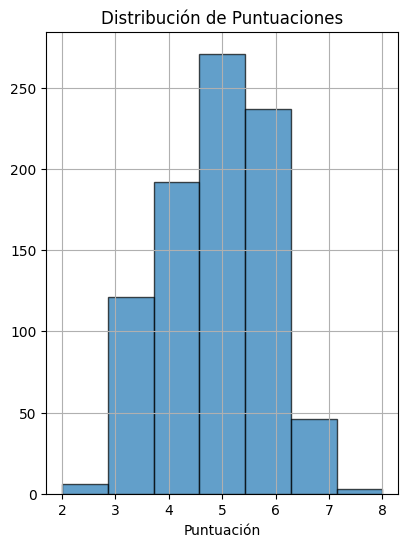

In [53]:
# Histograma de puntuaciones
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
final_metrics['score'].hist(bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribución de Puntuaciones')
plt.xlabel('Puntuación')

La distribucion de puntuaciones muestra que la mayoria de los usuarios obtienen una puntiacion de 5 seguida por 6, asi que los datos no son malos pero se podria mejorar el servicio.

**TOP/BOTTOM PERFORMERS**

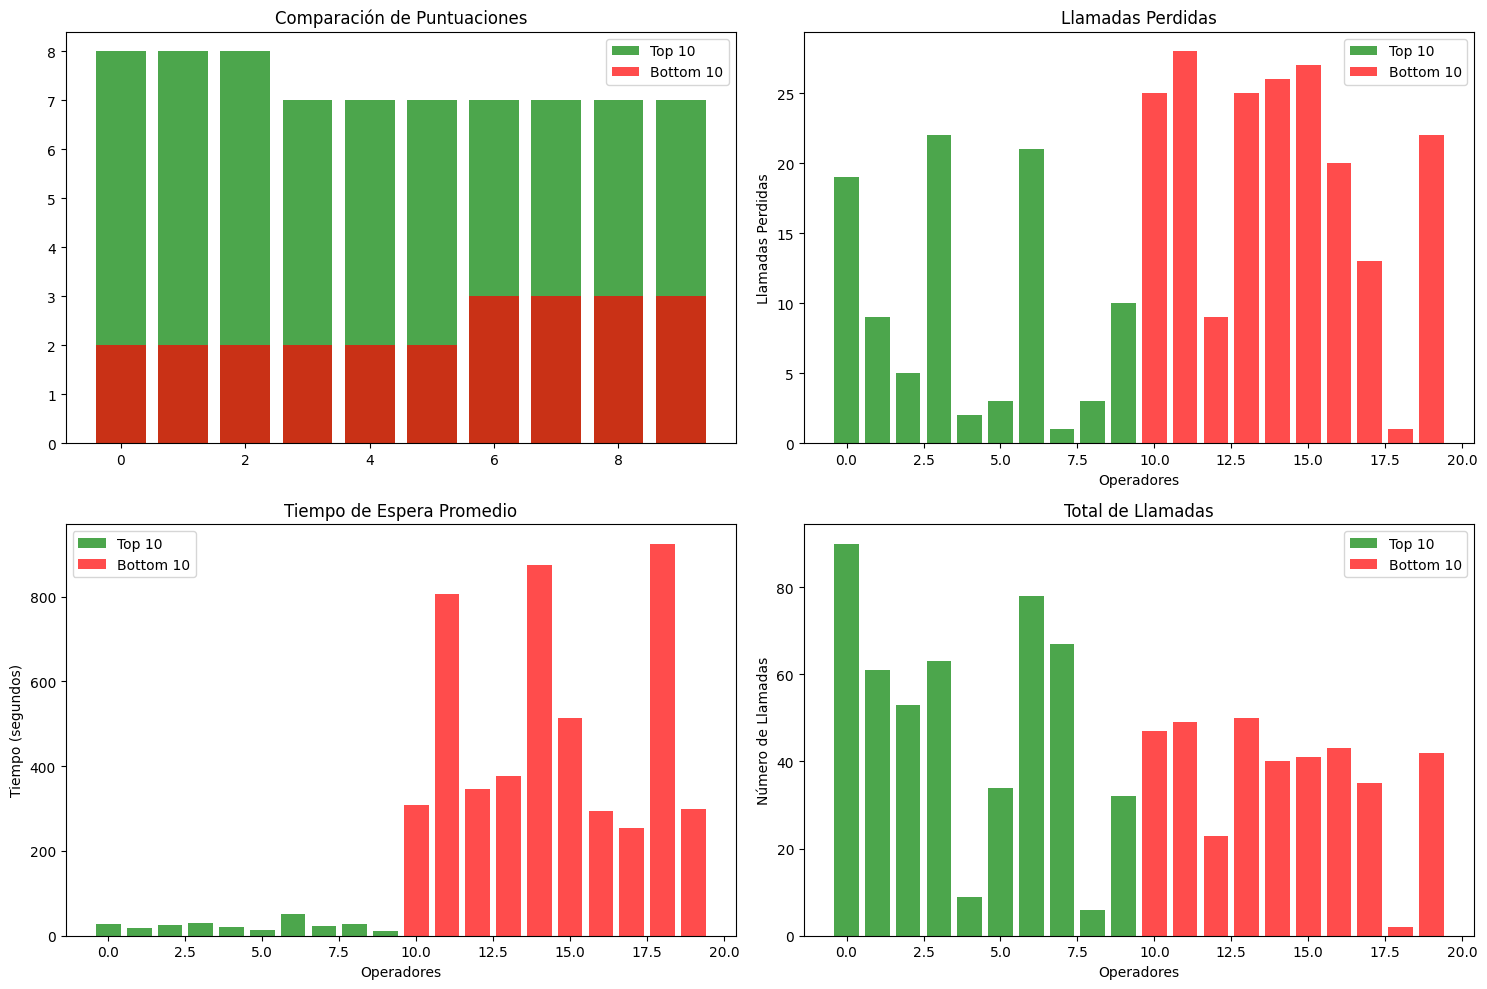

In [54]:
# Comparacion Top vs Bottom performers
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Top 10 operadores
top_10 = final_metrics.nlargest(10,'score')
bottom_10 = final_metrics.nsmallest(10, 'score')

# Grafico #1: Puntuaciones
axes[0,0].bar(range(len(top_10)), top_10['score'], color='green', alpha=0.7, label='Top 10')
axes[0,0].bar(range(len(bottom_10)), bottom_10['score'], color='red', alpha=0.7, label='Bottom 10')
axes[0,0].set_title('Comparación de Puntuaciones')
axes[0,0].legend()

# Gráfico 2: Llamadas Perdidas
axes[0,1].bar(range(len(top_10)), top_10['missed_calls'], color='green', alpha=0.7, label='Top 10')
axes[0,1].bar(range(len(top_10), len(top_10) + len(bottom_10)), bottom_10['missed_calls'], color='red', alpha=0.7, label='Bottom 10')
axes[0,1].set_title('Llamadas Perdidas')
axes[0,1].set_xlabel('Operadores')
axes[0,1].set_ylabel('Llamadas Perdidas')
axes[0,1].legend()

# Gráfico 3: Tiempo de Espera Promedio
axes[1,0].bar(range(len(top_10)), top_10['avg_waiting_time'], color='green', alpha=0.7, label='Top 10')
axes[1,0].bar(range(len(top_10), len(top_10) + len(bottom_10)), bottom_10['avg_waiting_time'], color='red', alpha=0.7, label='Bottom 10')
axes[1,0].set_title('Tiempo de Espera Promedio')
axes[1,0].set_xlabel('Operadores')
axes[1,0].set_ylabel('Tiempo (segundos)')
axes[1,0].legend()

# Gráfico 4: Total de Llamadas
axes[1,1].bar(range(len(top_10)), top_10['total_calls'], color='green', alpha=0.7, label='Top 10')
axes[1,1].bar(range(len(top_10), len(top_10) + len(bottom_10)), bottom_10['total_calls'], color='red', alpha=0.7, label='Bottom 10')
axes[1,1].set_title('Total de Llamadas')
axes[1,1].set_xlabel('Operadores')
axes[1,1].set_ylabel('Número de Llamadas')
axes[1,1].legend()

plt.tight_layout()
plt.show()

A partir dde los graficos la mayores diferencia se evidencian en el tiempo de espera promedio. Sin embargo si hay difernecia entre los 10 mejores operadores y los 10 peores operadores. 

Esto brindará a los supervisores y las supervisores información sobre los operadores menos eficaces.